# Preprocess

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, sys

PROJECT_ROOT = os.path.abspath("..")   # adjust if needed
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

from setup.preprocess import (
    gamma_correct,
    remove_vignette,
    denoise,
    sharpen,
    to_grayscale,
)


Processing 50 images from:
  /Users/fiona_spencer/Desk/ComputerVision/Projects/CV-Project/data/CALI/cali_images
Saved BW: /Users/fiona_spencer/Desk/ComputerVision/Projects/CV-Project/data/CALI/cali_bw/calib_15.jpg
Saved BW: /Users/fiona_spencer/Desk/ComputerVision/Projects/CV-Project/data/CALI/cali_bw/calib_01.jpg
Saved BW: /Users/fiona_spencer/Desk/ComputerVision/Projects/CV-Project/data/CALI/cali_bw/calib_29.jpg
Saved BW: /Users/fiona_spencer/Desk/ComputerVision/Projects/CV-Project/data/CALI/cali_bw/calib_28.jpg
Saved BW: /Users/fiona_spencer/Desk/ComputerVision/Projects/CV-Project/data/CALI/cali_bw/calib_00.jpg
Saved BW: /Users/fiona_spencer/Desk/ComputerVision/Projects/CV-Project/data/CALI/cali_bw/calib_14.jpg
Saved BW: /Users/fiona_spencer/Desk/ComputerVision/Projects/CV-Project/data/CALI/cali_bw/calib_02.jpg
Saved BW: /Users/fiona_spencer/Desk/ComputerVision/Projects/CV-Project/data/CALI/cali_bw/calib_16.jpg
Saved BW: /Users/fiona_spencer/Desk/ComputerVision/Projects/CV-Project/d

In [2]:
IMAGE_PATH = "../data/CALI/cali_bw/calib_11.jpg"

img = cv2.imread(IMAGE_PATH)
if img is None:
    raise FileNotFoundError("Image not found at provided path")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
gamma = gamma_correct(img, gamma=1.25)
vignette = remove_vignette(gamma, strength=0.65)
denoised = denoise(vignette)
sharpened = sharpen(denoised, amount=1.6)
gray = to_grayscale(sharpened)

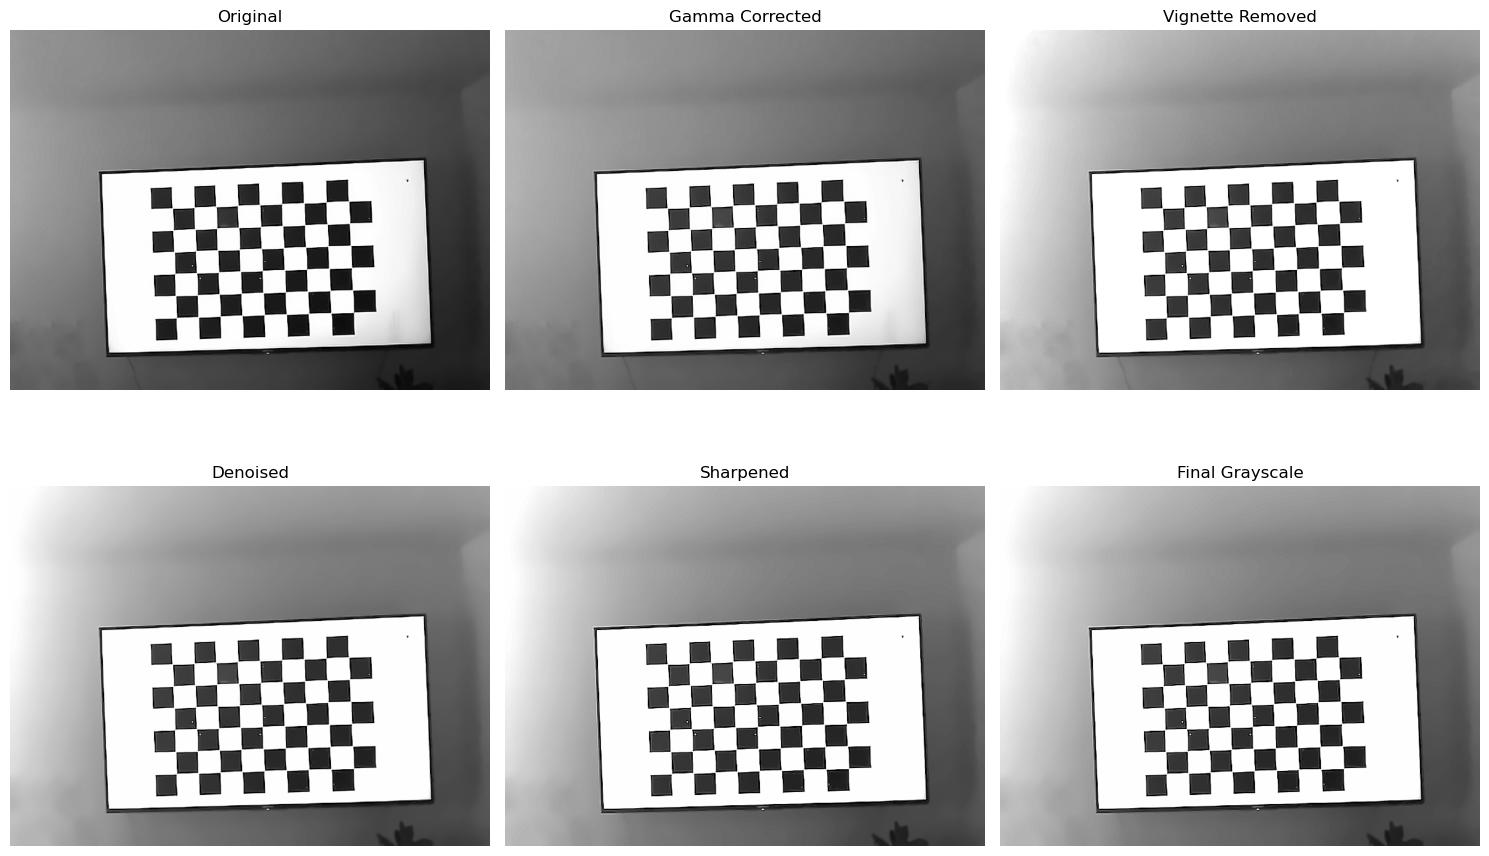

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

images = [
    (img_rgb, "Original"),
    (cv2.cvtColor(gamma, cv2.COLOR_BGR2RGB), "Gamma Corrected"),
    (cv2.cvtColor(vignette, cv2.COLOR_BGR2RGB), "Vignette Removed"),
    (cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB), "Denoised"),
    (cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB), "Sharpened"),
    (gray, "Final Grayscale")
]

for ax, (im, title) in zip(axes, images):
    ax.imshow(im, cmap="gray" if len(im.shape) == 2 else None)
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [6]:
bw_img = preprocess_bw(img)

plt.figure(figsize=(6,6))
plt.title("Preprocessed BW Image")
plt.imshow(bw_img, cmap="gray")
plt.axis("off")
plt.show()


NameError: name 'preprocess_bw' is not defined